# Project 4!!

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

%matplotlib inline

pd.set_option('display.max_rows', 100) # to look at more rows of data later
pd.set_option('display.max_columns', 100) # to expand columns view so that all can be seen later

In [7]:
# Load dataset
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
weather_df = pd.read_csv('../dataset/weather_final.csv')

In [8]:
# Print shape of dataset
print(train_df.shape)
print(test_df.shape)

(10506, 12)
(116293, 11)


In [9]:
# Print columns
print(train_df.columns)
print(test_df.columns)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')
Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')


In [10]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [11]:
test_df.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [12]:
print(train_df[train_df.duplicated()].count())

Date                      813
Address                   813
Species                   813
Block                     813
Street                    813
Trap                      813
AddressNumberAndStreet    813
Latitude                  813
Longitude                 813
AddressAccuracy           813
NumMosquitos              813
WnvPresent                813
dtype: int64


In [13]:
print(test_df[test_df.duplicated()].count())

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64


In [83]:
pd.to_datetime(train_df['Date'],format='%Y-%m-%d').dt.strftime("%Y-%m").value_counts().sort_index()
# Training Data is available for 
# 2007, 2009 (may-oct), 
# 2011 , 2013 (june - sept)

2007-05      25
2007-06     175
2007-07     460
2007-08    1321
2007-09     655
2007-10     201
2009-05      56
2009-06     469
2009-07     623
2009-08     328
2009-09     382
2009-10      63
2011-06     314
2011-07     536
2011-08     455
2011-09     489
2013-06     379
2013-07     501
2013-08     731
2013-09     447
Name: Date, dtype: int64

In [84]:
# is Training data available for every day during these period?
d = pd.concat([train_df[['Date']] ,pd.to_datetime(train_df['Date']).dt.to_period("M")], axis=1)
d.columns = ['date','year_month']
d.drop_duplicates().groupby(by=['year_month']).count()

# Data collection frequency is not consistent across months (collected )

,date
year_month,
2007-05,1
2007-06,3
2007-07,6
2007-08,13
2007-09,8
2007-10,2
2009-05,1
2009-06,9
2009-07,7


In [14]:
train_df.groupby(by=['Date','Address','Species','WnvPresent']).sum()

Block  \
Date       Address                                            Species                WnvPresent          
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA        CULEX PIPIENS/RESTUANS 0              11   
                                                              CULEX RESTUANS         0              11   
           1100 South Peoria Street, Chicago, IL 60608, USA   CULEX RESTUANS         0              11   
           1100 West Chicago Avenue, Chicago, IL 60642, USA   CULEX RESTUANS         0              11   
           1500 North Long Avenue, Chicago, IL 60651, USA     CULEX RESTUANS         0              15   
...                                                                                                ...   
2013-09-26 South Stony Island Avenue, Chicago, IL, USA        CULEX PIPIENS          0              10   
                                                              CULEX PIPIENS/RESTUANS 0              10   
           South Vincennes Avenue, Chicago, IL, USA           CULEX PIPIENS/RESTUANS 0              10   
           University of Illinois at Chicago, 1100 South A... CULEX PIPIENS/RESTUANS 0              11   
           West Garfield Boulevard, Chicago, IL, USA          CULEX PIPIENS/RESTUANS 0              90   

                                                                                                  Latitude  \
Date       Address                                            Species                WnvPresent              
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA        CULEX PIPIENS/RESTUANS 0           41.867108   
                                                              CULEX RESTUANS         0           41.867108   
           1100 South Peoria Street, Chicago, IL 60608, USA   CULEX RESTUANS         0           41.862292   
           1100 West Chicago Avenue, Chicago, IL 60642, USA   CULEX RESTUANS         0           41.896282   
           1500 North Long Avenue, Chicago, IL 60651, USA     CULEX RESTUANS         0           41.907645   
...                                                                                                    ...   
2013-09-26 South Stony Island Avenue, Chicago, IL, USA        CULEX PIPIENS          0           41.726465   
                                                              CULEX PIPIENS/RESTUANS 0           41.726465   
           South Vincennes Avenue, Chicago, IL, USA           CULEX PIPIENS/RESTUANS 0           41.723195   
           University of Illinois at Chicago, 1100 South A... CULEX PIPIENS/RESTUANS 0           41.868077   
           West Garfield Boulevard, Chicago, IL, USA          CULEX PIPIENS/RESTUANS 0           41.793818   

                                                                                                 Longitude  \
Date       Address                                            Species                WnvPresent              
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA        CULEX PIPIENS/RESTUANS 0          -87.654224   
                                                              CULEX RESTUANS         0          -87.654224   
           1100 South Peoria Street, Chicago, IL 60608, USA   CULEX RESTUANS         0          -87.648860   
           1100 West Chicago Avenue, Chicago, IL 60642, USA   CULEX RESTUANS         0          -87.655232   
           1500 North Long Avenue, Chicago, IL 60651, USA     CULEX RESTUANS         0          -87.760886   
...                                                                                                    ...   
2013-09-26 South Stony Island Avenue, Chicago, IL, USA        CULEX PIPIENS          0          -87.585413   
                                                              CULEX PIPIENS/RESTUANS 0          -87.585413   
           South Vincennes Avenue, Chicago, IL, USA           CULEX PIPIENS/RESTUANS 0          -87.649970   
           University of Illinois at Chicago, 1100 South A... CULEX PIPIENS/R

In [15]:
# Drop duplicates
train_df.drop_duplicates(subset=['Date','Address','Species','Trap','Block','WnvPresent'],inplace=True)
train_df.reset_index(inplace=True)

In [16]:
train_df.shape

(8610, 13)

In [17]:
# Check which mozzies spread WNV
train_df[train_df['WnvPresent'] == 1]['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

In [18]:
# Check if there's overlap
train_df[train_df['WnvPresent'] == 0]['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [19]:
# # Find probability of ocurrence for each mosquito
# prob_1 = train_df[train_df['Species'] == 'CULEX PIPIENS/RESTUANS']['WnvPresent'].sum()/train_df[train_df['Species'] == 'CULEX PIPIENS/RESTUANS']['WnvPresent'].count()
# prob_2 = train_df[train_df['Species'] == 'CULEX PIPIENS']['WnvPresent'].sum()/train_df[train_df['Species'] == 'CULEX PIPIENS']['WnvPresent'].count()
# prob_3 = train_df[train_df['Species'] == 'CULEX RESTUANS']['WnvPresent'].sum()/train_df[train_df['Species'] == 'CULEX RESTUANS']['WnvPresent'].count()

In [20]:
# # Ordinal encode species
# ord_list = []
# for i in train_df['Species']:
#     if i == 'CULEX PIPIENS/RESTUANS':
#         ord_list.append(prob_1)
#     elif i == 'CULEX PIPIENS':
#         ord_list.append(prob_2)
#     elif i == 'CULEX RESTUANS':
#         ord_list.append(prob_3)
#     else:
#         ord_list.append(0)

# train_df['Species_Enc'] = ord_list

In [21]:
# # Ordinal encode species
# ord_list = []
# for i in test_df['Species']:
#     if i == 'CULEX PIPIENS/RESTUANS':
#         ord_list.append(2)
#     elif i == 'CULEX PIPIENS':
#         ord_list.append(3)
#     elif i == 'CULEX RESTUANS':
#         ord_list.append(1)
#     else:
#         ord_list.append(0)

# test_df['Species_Enc'] = ord_list

In [22]:
# One-hot encode mozzies that spread WNV
train_species = pd.get_dummies(train_df['Species'])[['CULEX PIPIENS/RESTUANS','CULEX PIPIENS','CULEX RESTUANS']]
test_species = pd.get_dummies(test_df['Species'])[['CULEX PIPIENS/RESTUANS','CULEX PIPIENS','CULEX RESTUANS']]

In [23]:
train_df = pd.concat([train_df,train_species],axis=1,sort=False)
test_df = pd.concat([test_df,test_species],axis=1,sort=False)

In [24]:
# Calculate euclidean distance of weather station from city and determine which station is nearest
# This is calculated using pythagoras theorem  
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
train_df['diststat1'] = np.sqrt((train_df['Latitude'] - 41.995) ** 2 + (train_df['Longitude'] - (-87.933)) ** 2)
train_df['diststat2'] = np.sqrt((train_df['Latitude'] - 41.786) ** 2 + (train_df['Longitude'] - (-87.752)) ** 2)
train_df['Station'] = [2 if train_df['diststat1'][i] > train_df['diststat2'][i] else 1 for i in range(train_df.shape[0])]
train_df.head()


,index,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,CULEX PIPIENS/RESTUANS,CULEX PIPIENS,CULEX RESTUANS,diststat1,diststat2,Station
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,0,0,0.138026,0.175660,1
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,0,0,1,0.138026,0.175660,1
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,0,0,1,0.163721,0.209704,1
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,0,0,0.110190,0.201691,1
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,0,0,1,0.110190,0.201691,1


In [25]:
# Apply for test data set

test_df['diststat1'] = np.sqrt((test_df['Latitude'] - 41.995) ** 2 + (test_df['Longitude'] - (-87.933)) ** 2)
test_df['diststat2'] = np.sqrt((test_df['Latitude'] - 41.786) ** 2 + (test_df['Longitude'] - (-87.752)) ** 2)
test_df['Station'] = [2 if test_df['diststat1'][i] > test_df['diststat2'][i] else 1 for i in range(test_df.shape[0])]
test_df.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,CULEX PIPIENS/RESTUANS,CULEX PIPIENS,CULEX RESTUANS,diststat1,diststat2,Station
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,0.138026,0.17566,1
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,1,0.138026,0.17566,1
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,1,0,0.138026,0.17566,1
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,0.138026,0.17566,1
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,0.138026,0.17566,1


In [26]:
train_df['dateofyear'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d').dt.dayofyear
test_df['dateofyear'] = pd.to_datetime(test_df['Date'], format='%Y-%m-%d').dt.dayofyear

In [27]:
# Merged weather and train/test to one dataframe
train_weather_df = pd.merge(train_df,weather_df,on=['Station','Date'])
train_weather_df.drop(axis=1,columns=['index'],inplace=True)
train_weather_df.head()
train_weather_df.to_csv('../dataset/train_weather.csv')

In [28]:
test_weather_df = pd.merge(test_df,weather_df,on=['Station','Date'])
# test_weather_df.drop(axis=1,columns=['Water1','Depth'],inplace=True)
test_weather_df.head()
train_weather_df.to_csv('../dataset/test_weather.csv')

In [29]:
train_weather_df.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
CULEX PIPIENS/RESTUANS      uint8
CULEX PIPIENS               uint8
CULEX RESTUANS              uint8
diststat1                 float64
diststat2                 float64
Station                     int64
dateofyear                  int64
Tmax                        int64
Tmin                        int64
Tavg                      float64
Depart                    float64
DewPoint                    int64
WetBulb                   float64
Heat                      float64
Cool                      float64
Sunrise                     int64
Sunset                      int64
CodeSum       

In [30]:
np.abs(train_weather_df.corr()[['WnvPresent']]).sort_values(by='WnvPresent',ascending=False).head(31).T

,WnvPresent,NumMosquitos,dateofyear,Month,Sunrise,CULEX PIPIENS,CULEX RESTUANS,DewPoint,WetBulb,Station,Tmin,Longitude,Tavg,Cool,Depart,diststat1,Sunset,Tmax,Heat,ResultSpeed,Year,AvgSpeed,diststat2,Latitude,PrecipTotal,CULEX PIPIENS/RESTUANS,Block,AddressAccuracy,StnPressure,SeaLevel,ResultDir
WnvPresent,1.0,0.298589,0.100332,0.096551,0.096179,0.095826,0.09217,0.08854,0.087747,0.080604,0.078567,0.074075,0.07106,0.067323,0.063704,0.061033,0.05857,0.055976,0.054174,0.048979,0.042496,0.034714,0.033516,0.030907,0.021415,0.018785,0.011303,0.007886,0.007118,0.006683,0.001152


Text(0.5, 0.98, 'Wnv Counts across Months')

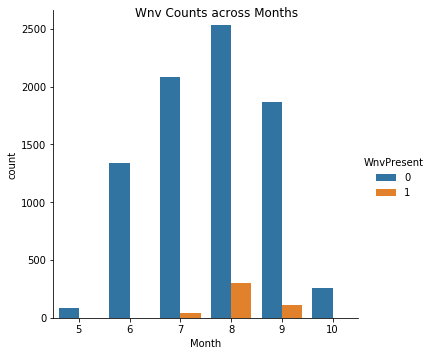

In [140]:
sns.catplot(data=tr_w, x="Month", kind="count", hue='WnvPresent').fig.suptitle("Wnv Counts across Months")

Text(0.5, 0.98, 'WetBulb Vs Average Temperature')

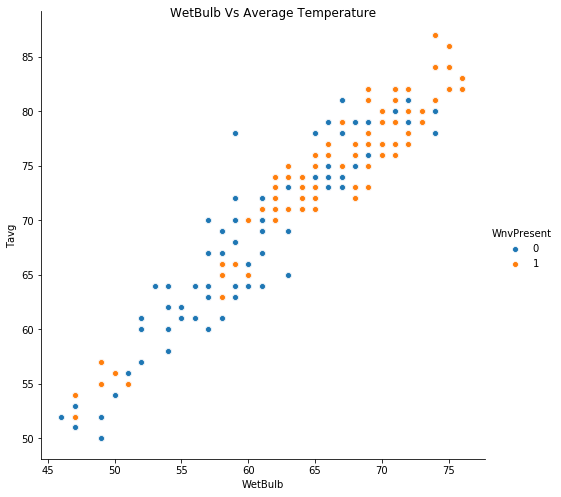

In [54]:
sns.pairplot(data=train_weather_df, x_vars='WetBulb', y_vars='Tavg', hue='WnvPresent', size=7).fig.suptitle("WetBulb Vs Average Temperature")

C:\Users\User\Anaconda3\envs\dsi\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Wnv Counts across Months')

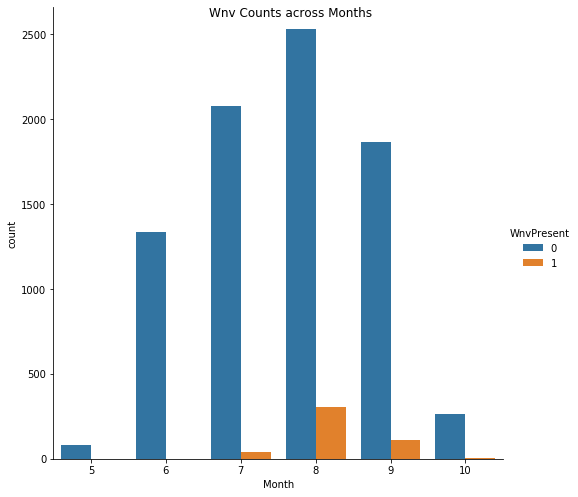

In [56]:
sns.catplot(data=train_weather_df, x="Month", kind="count", hue='WnvPresent', size=7).fig.suptitle("Wnv Counts across Months")

In [31]:
# # Get the correleation

# corr = train_weather_df.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(20, 20))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Correlation')

In [32]:
feat = ['dateofyear','Latitude','Longitude','AddressAccuracy','CULEX PIPIENS/RESTUANS','CULEX PIPIENS','CULEX RESTUANS','Heat','Cool','WetBulb','PrecipTotal','Sunrise','Sunset','Tmin','Tmax','DewPoint']

X_subset = train_weather_df[feat]
y = train_weather_df['WnvPresent']
X_kaggle_subset = test_weather_df[feat]

In [33]:
X_subset.head()

,dateofyear,Latitude,Longitude,AddressAccuracy,CULEX PIPIENS/RESTUANS,CULEX PIPIENS,CULEX RESTUANS,Heat,Cool,WetBulb,PrecipTotal,Sunrise,Sunset,Tmin,Tmax,DewPoint
0,149,41.954690,-87.800991,9,1,0,0,0.0,9.0,65.0,0.0,421,1917,60,88,58
1,149,41.954690,-87.800991,9,0,0,1,0.0,9.0,65.0,0.0,421,1917,60,88,58
2,149,41.994991,-87.769279,9,0,0,1,0.0,9.0,65.0,0.0,421,1917,60,88,58
3,149,41.974089,-87.824812,8,1,0,0,0.0,9.0,65.0,0.0,421,1917,60,88,58
4,149,41.974089,-87.824812,8,0,0,1,0.0,9.0,65.0,0.0,421,1917,60,88,58


In [34]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_subset)
X_kaggle_poly = poly.fit_transform(X_kaggle_subset)

In [35]:
poly_train = pd.DataFrame(X_train_poly, columns = poly.get_feature_names(X_subset.columns))
poly_kaggle = pd.DataFrame(X_kaggle_poly, columns = poly.get_feature_names(X_kaggle_subset.columns))

In [61]:
poly_train.columns

Index(['dateofyear', 'Latitude', 'Longitude', 'AddressAccuracy',
       'CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS', 'Heat',
       'Cool', 'WetBulb',
       ...
       'Sunrise Tmin', 'Sunrise Tmax', 'Sunrise DewPoint', 'Sunset Tmin',
       'Sunset Tmax', 'Sunset DewPoint', 'Tmin Tmax', 'Tmin DewPoint',
       'Tmax DewPoint', 'WnvPresent'],
      dtype='object', length=137)

In [62]:
poly_train.shape

(8610, 137)

In [70]:
poly_corr = pd.concat([ poly_train, train_weather_df['WnvPresent'] ])
poly_corr = poly_corr.corr()['WnvPresent']

In [76]:
poly_corr[np.abs(poly_corr) > 0.11]

Sunrise DewPoint       0.139731
Sunrise Sunset         0.120361
Sunrise Tmax           0.115865
Sunrise Tmin           0.137021
WetBulb Sunrise        0.142523
WnvPresent             1.000000
dateofyear DewPoint    0.141273
dateofyear Sunset      0.115044
dateofyear Tmax        0.118866
dateofyear Tmin        0.136530
dateofyear WetBulb     0.139305
Name: WnvPresent, dtype: float64

In [36]:
poly_train['WnvPresent'] = train_weather_df['WnvPresent']

In [37]:
np.abs(poly_train.corr()[['WnvPresent']]).sort_values(by='WnvPresent',ascending=False).head(31).T

,WnvPresent,WetBulb Sunrise,dateofyear DewPoint,Sunrise DewPoint,dateofyear WetBulb,Sunrise Tmin,dateofyear Tmin,Sunrise Sunset,dateofyear Tmax,Sunrise Tmax,dateofyear Sunset,CULEX PIPIENS Cool,CULEX PIPIENS DewPoint,CULEX PIPIENS Tmin,CULEX PIPIENS WetBulb,dateofyear Latitude,dateofyear Longitude,dateofyear,CULEX PIPIENS Tmax,CULEX PIPIENS Sunrise,dateofyear CULEX PIPIENS,Latitude Sunrise,Longitude Sunrise,Sunrise,Latitude CULEX PIPIENS,Longitude CULEX PIPIENS,CULEX PIPIENS Sunset,CULEX PIPIENS,AddressAccuracy CULEX PIPIENS,dateofyear Sunrise,CULEX RESTUANS Sunset
WnvPresent,1.0,0.142523,0.141273,0.139731,0.139305,0.137021,0.13653,0.120361,0.118866,0.115865,0.115044,0.105437,0.105344,0.103297,0.102892,0.100957,0.100865,0.100332,0.098708,0.097986,0.097448,0.097054,0.096952,0.096179,0.095906,0.095871,0.095829,0.095826,0.093898,0.092736,0.092481


In [78]:
# feature_list = [
#                 'dateofyear CULEX PIPIENS/RESTUANS',
#                 'dateofyear CULEX PIPIENS',
#                 'dateofyear CULEX RESTUANS',
#                 'Latitude CULEX PIPIENS/RESTUANS',
#                 'Latitude CULEX PIPIENS',
#                 'Latitude CULEX RESTUANS',
#                 'Longitude CULEX PIPIENS/RESTUANS', 
#                 'Longitude CULEX PIPIENS',
#                 'Longitude CULEX RESTUANS',              
#                'WetBulb','Sunrise','Sunset','Tmin','Tmax','DewPoint']

# feature_list = ['WetBulb Sunrise',
#                'dateofyear DewPoint',
#                'Sunrise DewPoint',
#                'Sunrise Tmin',
#                'dateofyear Tmin',
#                'Sunrise Sunset',
#                'dateofyear Tmax',
#                'Sunrise Tmax',
#                'dateofyear Sunset']

feature_list = [
                'dateofyear CULEX PIPIENS/RESTUANS',
                'dateofyear CULEX PIPIENS',
                'dateofyear CULEX RESTUANS',
                'CULEX PIPIENS/RESTUANS Sunrise',
                'CULEX PIPIENS Sunrise',
                'CULEX RESTUANS Sunrise',
                'Longitude CULEX PIPIENS/RESTUANS', 
                'Longitude CULEX PIPIENS',
                'Longitude CULEX RESTUANS',              
               'WetBulb Sunrise','Sunrise', 'dateofyear DewPoint',
                'dateofyear WetBulb']


X = poly_train[feature_list]
# y = train_weather_df['WnvPresent']
X_kaggle = poly_kaggle[feature_list]

In [79]:
model_dict = {
    'ss': StandardScaler(),
    'lr': LogisticRegression(solver='lbfgs'),
    'nb': MultinomialNB(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'ada_dt': AdaBoostClassifier(),
    'ada_rf': AdaBoostClassifier(base_estimator=RandomForestClassifier()),
    'gboost': GradientBoostingClassifier()
}

model_full = {
    'ss': 'Standard Scaler',
    'lr': 'Logistic Regression',
    'knn': 'KNearestNeighbor',
    'nb': 'Multinomial NB',
    'dt': 'Decision Tree',
    'rf': 'Random Forest',
    'et': 'Extra Tree',
    'ada_dt': 'AdaBoost - Decision Tree',
    'ada_rf': 'AdaBoost - Random Forest',
    'gboost': 'Gradient Boosting Classifier'
}

param_dict = {    
    'knn': {
        'knn__n_neighbors': [2,3,4,5]
    },
    'lr': {
        'lr__max_iter': [100,200]
    },
    'nb': {},
    'dt': {
        'dt__max_depth': [5,7],
        'dt__min_samples_split': [10,15],
        'dt__min_samples_leaf': [3,4]
    },
    'rf': {
        'rf__n_estimators': [500,1000,2000],
        'rf__min_samples_split': [2,3],
        'rf__max_depth': [2,3],
        'rf__min_samples_leaf': [3,4]
        
    },
    'et': {
        'et__n_estimators': [1000,2000],
        'et__min_samples_split': [2,3],
    },
    'ada_dt': {
        'ada_dt__n_estimators': [50,100,200],
        'ada_dt__learning_rate': [0.9, 1]
    },
    'ada_rf': {
        'ada_rf__n_estimators': [50,100,200],
        'ada_rf__learning_rate': [0.9, 1],
        'ada_rf__base_estimator__max_depth': [3], 
        'ada_rf__base_estimator__min_samples_leaf': [4], 
        'ada_rf__base_estimator__min_samples_split': [2], 
        'ada_rf__base_estimator__n_estimators': [1000]
    },
    'gboost': {
        'gboost__n_estimators': [50,100],
        'gboost__max_depth': [2,3,4],
        'gboost__learning_rate': [0.1, 0.5, 1]
    }
}

def prepare_pipeline(list_of_models):
    """
    Prepare pipeline of models to be used for modelling
    
    Parameters
    ----------
    list_of_models: list[str]
        List of models to be included for pipeline
    
    Returns
    -------
    Pipeline
        Pipeline of models to be run
    """
    pipe_list = [(i,model_dict[i]) for i in list_of_models]
    return Pipeline(pipe_list)

def add_params(name,pipe_dict):
    """
    Add parameters for GridSearch
    
    Parameters
    ----------
    name: str
        Name of model/vectorization method to have params added.
    pipe_dict: Dictionary
        Dictionary that contains parameters to be added into GridSearch
    
    Returns
    -------
    Dictionary
        Dictionary that contains parameters to be added for GridSearch
    """
    params = param_dict[name]
    for k,v in params.items():
        pipe_dict[k] = v
    return pipe_dict

def grid_search(model,train_data=X,train_target=y):
    """
    Initialize and run GridSearch
    
    Parameters
    ----------
    model: str
        Initialize which classification model to use. Note classification model has to be contained in model_dict.
        
    train_data: list[str]
        List of training data to be used
    
    Returns
    -------
    List
        List that contains predicted values of the test data
    """
    X_train, X_test, y_train,y_test = train_test_split(train_data,y,test_size=0.25,stratify=y,random_state=42)
    pipe_params = {}
    pipe_params = add_params(model,pipe_params)
    pipe = prepare_pipeline(['ss',model])
    gs = GridSearchCV(pipe,param_grid=pipe_params,cv=3,n_jobs=-1,scoring='roc_auc')
    gs.fit(X_train,y_train)
    print(f'Using {model_full[model]}:')
    print(f'Train Score: {round(gs.best_score_,4)}')
    print(f'Test Score: {round(gs.score(X_test,y_test),4)}')
    print(f'Using the following parameters: {gs.best_params_}')
    return {'model':gs, 'data':{'X_train':X_train,'X_test': X_test,'y_train':y_train, 'y_test': y_test } }


In [40]:
## Function to fit full data and predict kaggle target, store as csv
def predict_kaggle(model,output,X=X,y=y,X_kaggle=X_kaggle):
    model.fit(X,y)
    pred = model.predict_proba(X_kaggle)[:,1]
    pred_df = pd.DataFrame({'Id':test_weather_df['Id'],'WnvPresent': pred})
    pred_df.to_csv('../KaggleSubmission/'+output+'.csv',index=False)
    pass

In [35]:
grid_search('rf')

Using Random Forest:
Train Score: 0.8007
Test Score: 0.8174
Using the following parameters: {'rf__max_depth': 3, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}


In [80]:
predict_kaggle(RandomForestClassifier(n_estimators=1000,min_samples_leaf=4,min_samples_split=3,max_depth=3),'rf_prediction')

In [81]:
predict_kaggle(LogisticRegression(solver='lbfgs',max_iter=100),'lr_prediction')

C:\Users\Carol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
grid_search('ada_dt')

Using AdaBoost - Decision Tree:
Train Score: 0.8144
Test Score: 0.8444
Using the following parameters: {'ada_dt__learning_rate': 1, 'ada_dt__n_estimators': 100}


In [82]:
predict_kaggle(AdaBoostClassifier(learning_rate=1,n_estimators=100),'ada_prediction')

In [47]:
grid_search('gboost')

Using Gradient Boosting Classifier:
Train Score: 0.8174
Test Score: 0.838
Using the following parameters: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 3, 'gboost__n_estimators': 50}


In [83]:
predict_kaggle(GradientBoostingClassifier(n_estimators=50,max_depth=3,learning_rate=0.1),'gboost_prediction')

In [68]:
grid_search('ada_rf')

Using AdaBoost - Random Forest:
Train Score: 0.8125
Test Score: 0.841
Using the following parameters: {'ada_rf__base_estimator__max_depth': 3, 'ada_rf__base_estimator__min_samples_leaf': 4, 'ada_rf__base_estimator__min_samples_split': 2, 'ada_rf__base_estimator__n_estimators': 1000, 'ada_rf__learning_rate': 0.9, 'ada_rf__n_estimators': 50}


In [84]:
predict_kaggle(AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3,min_samples_leaf=4,min_samples_split=2,n_estimators=1000),learning_rate=0.9,n_estimators=50),'ada_rf_prediction')

In [46]:
m = grid_search('lr')

Using Logistic Regression:
Train Score: 0.7265
Test Score: 0.711
Using the following parameters: {'lr__max_iter': 100}


In [80]:
m = grid_search('lr')

Using Logistic Regression:
Train Score: 0.7244
Test Score: 0.7125
Using the following parameters: {'lr__max_iter': 100}


In [82]:
m = grid_search('gboost')

Using Gradient Boosting Classifier:
Train Score: 0.8195
Test Score: 0.8422
Using the following parameters: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 3, 'gboost__n_estimators': 50}


In [57]:
from sklearn.metrics import roc_curve
def get_roc_curve(model, X_val, y_val):
    '''
    Plots a ROC graph of a given model.
    Provide the model, X_val and y_val values
    '''
    pos_preds = model.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, pos_preds, pos_label=1)
    
    plt.figure(figsize=(14,8))
    # Plot ROC curve
    plt.plot(fpr,tpr, label='ROC Curve')
    plt.plot([0,1],[0,1], linestyle='--', label='baseline')

    # Label axes.
    plt.title(f"ROC Curve with AUC = {round(roc_auc_score(y_val, pos_preds),3)}", fontsize=22)
    plt.ylabel('Sensitivity (True Positive Rate)', fontsize=18)
    plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=18)

    # Create legend.
    plt.legend(fontsize=16);

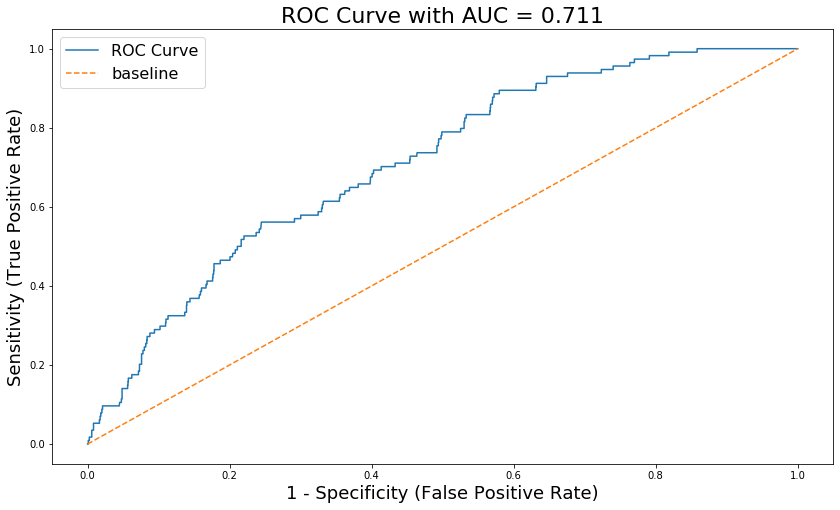

In [50]:
get_roc_curve(m['model'], m['data']['X_test'], m['data']['y_test'])